<a href="https://colab.research.google.com/github/nedokormysh/Stepik_DLS_basic/blob/week7/DLS_homework_16_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [1]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 50.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 17.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 13.5MB/s]


In [2]:
path_train = './train.csv'
path_test = './test.csv'

Оптимизируем объём памяти.

In [3]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [6]:
print('train')
train = import_data(path_train)

print('-' * 80)
print('test')
test = import_data(path_test)

train
Memory usage of dataframe is 0.81 MB
Memory usage after optimization is: 0.28 MB
Decreased by 65.7%
--------------------------------------------------------------------------------
test
Memory usage of dataframe is 0.26 MB
Memory usage after optimization is: 0.11 MB
Decreased by 55.6%


Посмотрим на случайные строки.

In [7]:
train.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1255,66,54.8125,3465.7,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,Yes,Mailed check,0
1753,55,90.4375,5044.8,Female,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Month-to-month,No,Electronic check,0
2791,10,20.0000,198.6,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),0
1787,49,88.1875,4159.45,Male,1,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,0
2545,48,108.1250,5067.45,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ClientPeriod              5282 non-null   int8    
 1   MonthlySpending           5282 non-null   float16 
 2   TotalSpent                5282 non-null   category
 3   Sex                       5282 non-null   category
 4   IsSeniorCitizen           5282 non-null   int8    
 5   HasPartner                5282 non-null   category
 6   HasChild                  5282 non-null   category
 7   HasPhoneService           5282 non-null   category
 8   HasMultiplePhoneNumbers   5282 non-null   category
 9   HasInternetService        5282 non-null   category
 10  HasOnlineSecurityService  5282 non-null   category
 11  HasOnlineBackup           5282 non-null   category
 12  HasDeviceProtection       5282 non-null   category
 13  HasTechSupportAccess      5282 non-null   catego

In [9]:
print(f'train shape = {train.shape},  test shape = {test.shape}')
print(f'train, test is null: {train.isna().any().any(), test.isna().any().any()}') 

train shape = (5282, 20),  test shape = (1761, 19)
train, test is null: (False, False)


Пропусков в наших данных нет.

In [10]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [11]:
print(f'\033[1mcat_features:\033[0m {cat_cols}, \033[1mamount\033[0m = {len(cat_cols)}')
print(f'\033[1mnum_features:\033[0m {num_cols}, \033[1mamount\033[0m = {len(num_cols)}')
print(f'\033[1mtargets:\033[0m {target_col}, \033[1mamount\033[0m = {len(target_col)}')

cat_features: ['Sex', 'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService', 'HasMultiplePhoneNumbers', 'HasInternetService', 'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription', 'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod'], amount = 16
num_features: ['ClientPeriod', 'MonthlySpending', 'TotalSpent'], amount = 3
targets: Churn, amount = 5


In [12]:
train.describe(include='all')

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
count,5282.000000,5282.000000,5282,5282,5282.000000,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282.000000
unique,NaN,NaN,4978,2,NaN,2,2,2,3,3,3,3,3,3,3,3,3,2,4,NaN
top,NaN,NaN,,Male,NaN,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN
freq,NaN,NaN,9,2655,NaN,2705,3676,4761,2511,2341,2612,2332,2317,2604,2099,2081,2920,3148,1786,NaN
mean,32.397009,inf,NaN,NaN,0.159409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.262022
std,24.550326,30.187500,NaN,NaN,0.366092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.439776
min,0.000000,18.250000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,9.000000,35.453125,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,29.000000,70.375000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,55.000000,90.062500,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


Преобразуем признак TotalSpent в числовой. Пропуски заменим на медианное значение.

In [18]:
train['TotalSpent'] = pd.to_numeric(train['TotalSpent'], errors='coerce')
test['TotalSpent'] = pd.to_numeric(test['TotalSpent'], errors='coerce')

In [23]:
print(train['TotalSpent'].isna().any())
print(test['TotalSpent'].isna().any())

True
True


In [24]:
train_median = train['TotalSpent'].median()
train['TotalSpent'] = train['TotalSpent'].fillna(value=train_median)
test['TotalSpent'] = test['TotalSpent'].fillna(value=train_median)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### Числовые признаки.

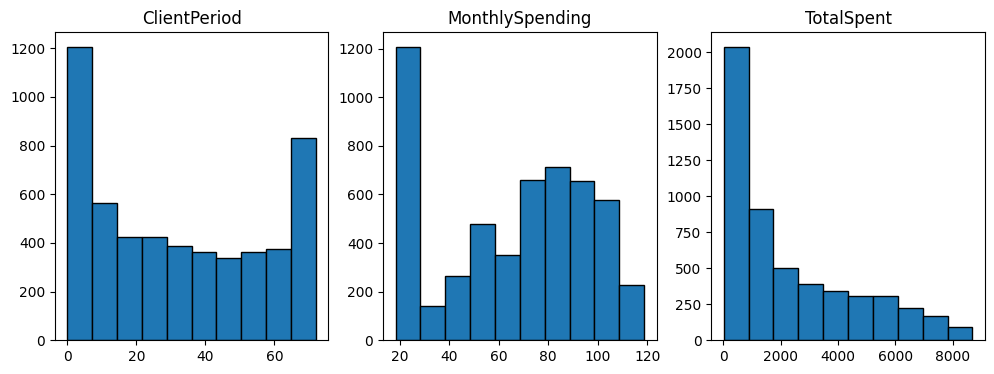

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12,4))
for i, col in enumerate(num_cols):
    ax[i].hist(train[col], edgecolor='black')
    ax[i].set_title(col)

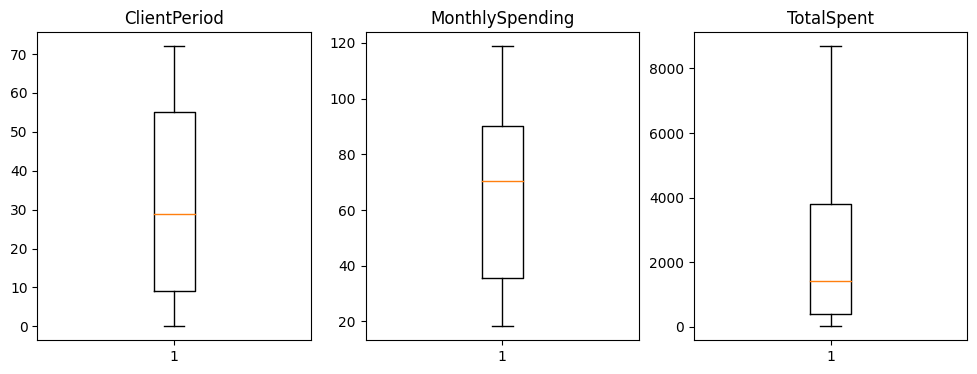

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12,4))
for i, col in enumerate(num_cols):
    ax[i].boxplot(train[col])
    ax[i].set_title(col)

Выбросов не наблюдается.

### Категориальные признаки.

In [42]:
# for col in cat_cols:
#     plt.subplots(figsize=(6,2))
#     print('Признак:', col)
#     x = train[col].unique()
#     print('уникальные значения', x)
#     y = train[col].value_counts()
#     plt.bar(x, y)
#     plt.title('Кол-во уникальных значений в ' + col)
#     plt.show()

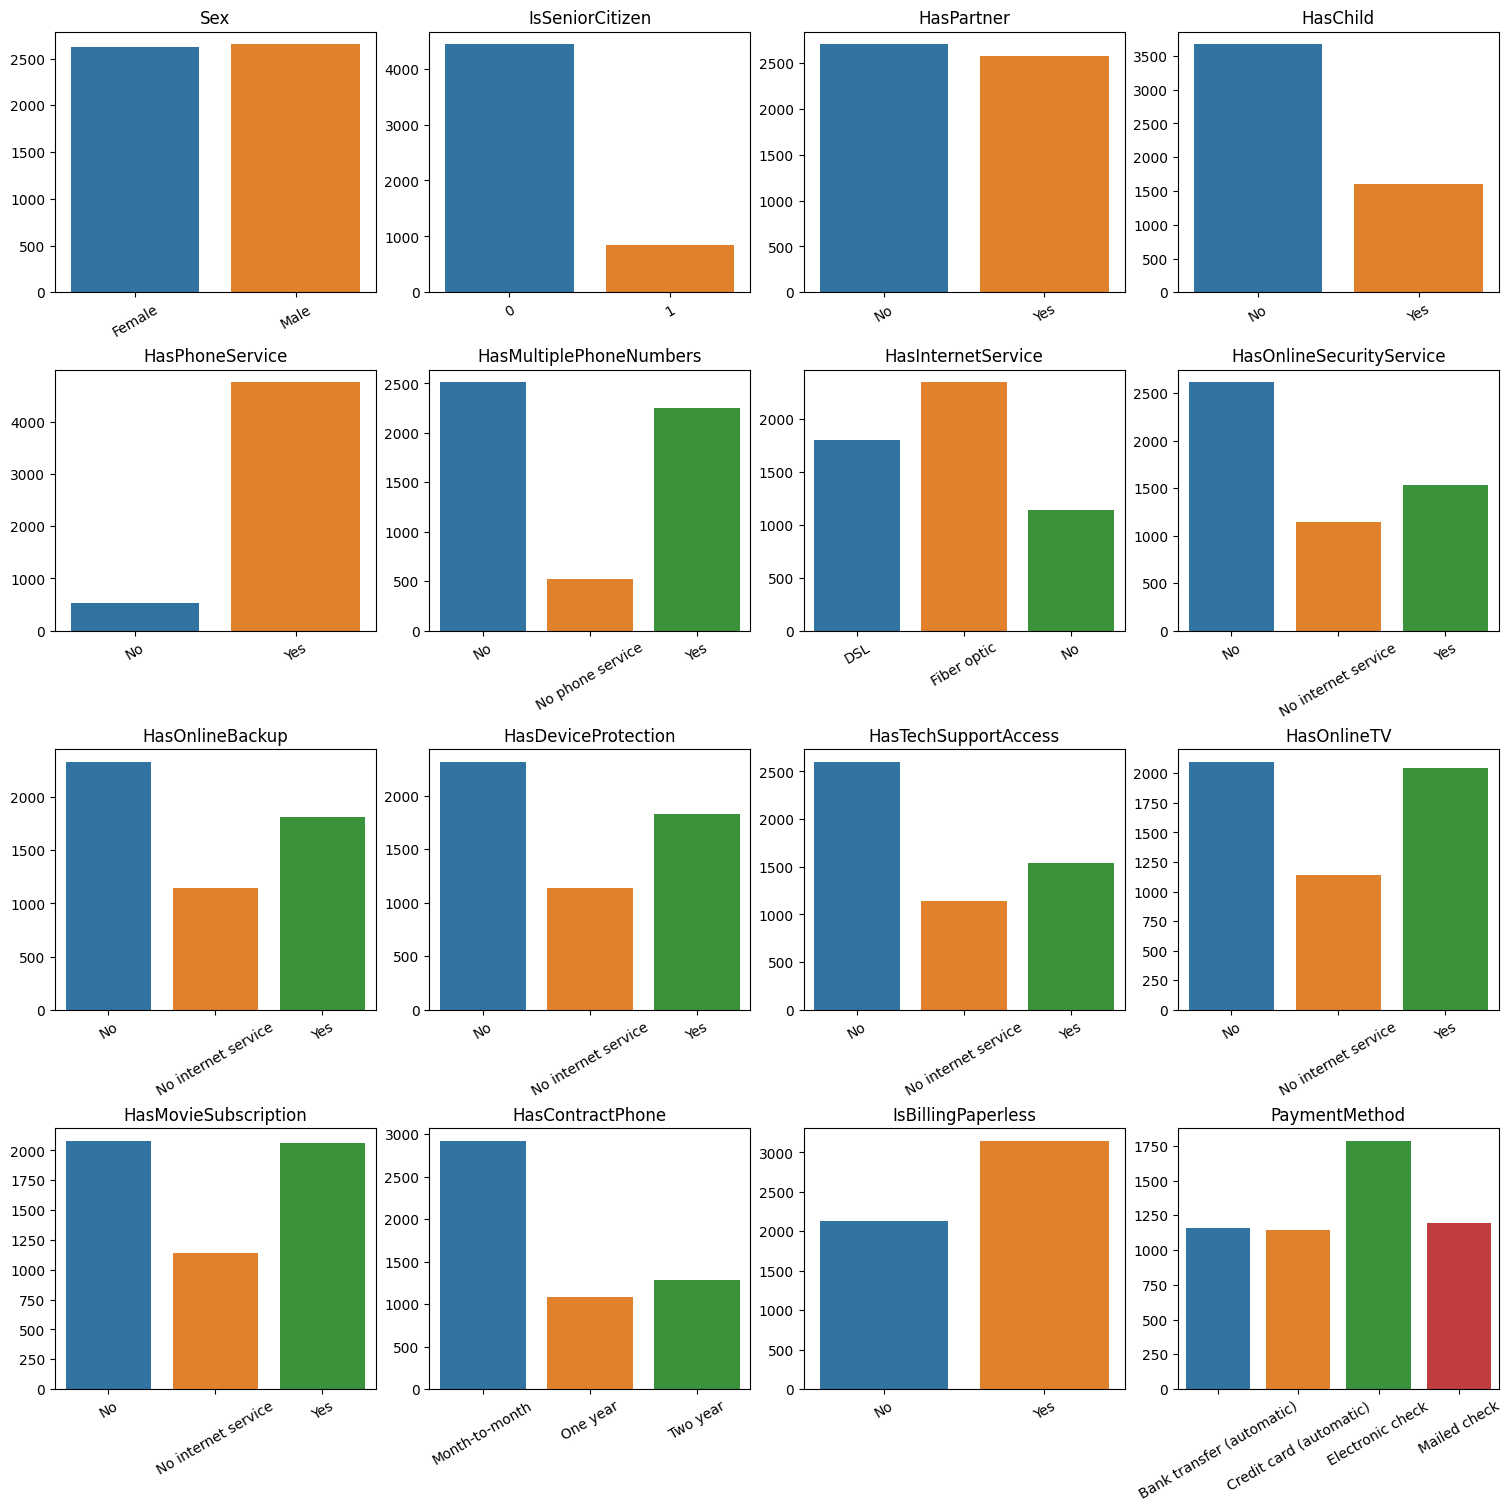

In [49]:
#Count number of categorical data and plot the barplots
fig, axes = plt.subplots(4, 4, figsize=(15, 15), constrained_layout=True)

for index, col in enumerate(cat_cols):
    counts = train[col].value_counts()
    chart = sns.barplot(x=counts.index, y=counts.values, palette="tab10", ax=axes.flat[index])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
    chart.set_title(col)

### Баланс классов в таргете.

0    3898
1    1384
Name: Churn, dtype: int64

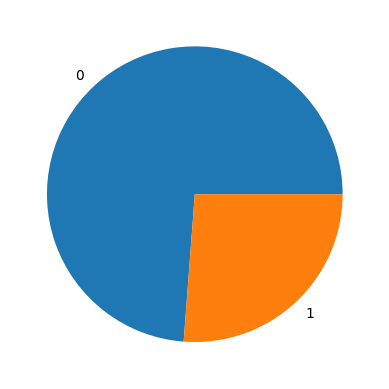

In [59]:
plt.pie(train[target_col].value_counts(), labels=[0, 1])
train[target_col].value_counts()

In [51]:
train[target_col].value_counts(normalize=True) * 100

0    73.797804
1    26.202196
Name: Churn, dtype: float64

Присутствует дисбаланс классов.

In [54]:
# sns.pairplot(train)

<ipython-input-58-5b2cf2e0be5c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(train.corr(), annot=True)


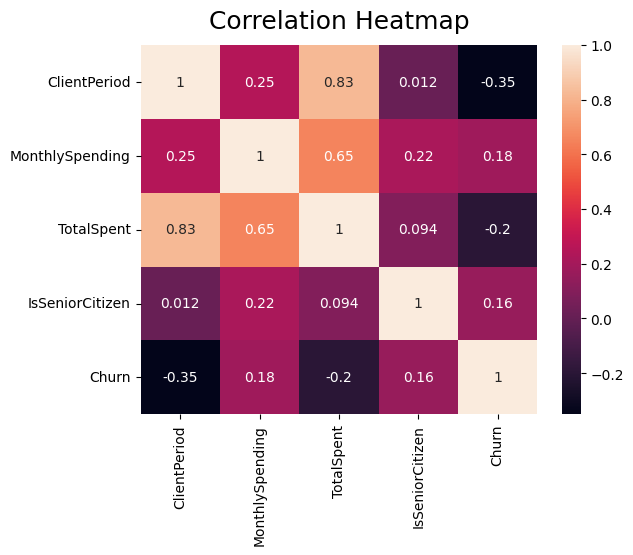

In [58]:
heatmap = sns.heatmap(train.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

Total Spent и Client Period имеют большую корреляцию.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [64]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import roc_auc_score, accuracy_score

In [80]:
# выделим целевую переменную из датасета
X_train = train.drop(target_col, axis=1)
y_train = train[target_col]

X_test = test

In [81]:
ohe_features = X_train.select_dtypes(include='category').columns.to_list()
num_features = X_train.select_dtypes(exclude='category').columns.to_list()

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
encoder.fit(X_train[ohe_features])

X_train[encoder.get_feature_names_out()] = encoder.transform(X_train[ohe_features])
X_train.drop(ohe_features, axis=1, inplace=True)

X_test[encoder.get_feature_names_out()] = encoder.transform(X_test[ohe_features])
X_test.drop(ohe_features, axis=1, inplace=True)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [82]:
scaler = StandardScaler()
scaler.fit(X_train[num_features])
X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

Подготовили данные для линейных моделей.

In [92]:
%%time
grid = {'C': [100, 10, 1, 0.1, 0.01, 0.001],    
        'max_iter': np.arange(200, 1000, 200),
        'penalty': ['l1', 'l2'], 
        'solver': ['liblinear', 'saga'],
        'random_state': [7575]}

cv_logreg = GridSearchCV(estimator=LogisticRegression(class_weight='balanced', random_state=7575), 
                         param_grid=grid,
                         cv=5,
                         refit=True, 
                         scoring='roc_auc',
                         n_jobs=-1, 
                         verbose=10)

cv_logreg.fit(X_train, y_train)

print('ROC-AUC =', cv_logreg.best_score_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
ROC-AUC = 0.844724102892205
CPU times: user 2.46 s, sys: 197 ms, total: 2.66 s
Wall time: 2min 13s


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [94]:
!pip install catboost -q

In [95]:
from catboost import CatBoostClassifier, Pool

In [116]:
%%time
X_train = train.drop(target_col, axis=1)
y_train = train[target_col]

grid = {'depth': np.arange(2, 10, 2),
        'learning_rate': [0.05, .1, .15],
        'l2_leaf_reg': [5, 7, 9],
        'min_data_in_leaf': [300, 400],
        'max_bin': [100, 200],
        'iterations': np.arange(200, 500, 100)}

gs_dataset = Pool(data=X_train, label=y_train, cat_features=cat_cols)

gs_clf = CatBoostClassifier(iterations=3500,
                            cat_features=cat_cols,
                            colsample_bylevel=0.098,
                            subsample=0.95,
                            random_strength=1,
                            task_type="CPU",
                            thread_count=-1,
                            random_seed=7575,
                            early_stopping_rounds=50,
                            logging_level="Silent",
                            eval_metric="AUC:hints=skip_train~false")

gs_clf.grid_search(grid, gs_dataset, cv=3, verbose=False, calc_cv_statistics=False)

CPU times: user 7min 31s, sys: 1min 6s, total: 8min 38s
Wall time: 5min 40s


{'params': {'border_count': 200,
  'min_data_in_leaf': 300,
  'depth': 2,
  'l2_leaf_reg': 9,
  'iterations': 200,
  'learning_rate': 0.1}}

In [128]:
gs_clf.fit(X_train, y_train)
pred_train = gs_clf.predict_proba(X_train)[:,1]

In [129]:
roc_auc_score(y_train, pred_train)

0.8545066834333304

# Предсказания

In [131]:
best_model = gs_clf

In [138]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] =  best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission_1.csv', index=False)

In [139]:
submission.head()

,Id,Churn
0,0,0.042216
1,1,0.657547
2,2,0.668809
3,3,0.013786
4,4,0.006562
